# Tabulating H0 cross-section as a function of frequency.

Let $\sigma_\nu$ denote the (microscopic) photoionization cross-section (units cm^2) of neutral hydrogen at frequency $\nu$, and $\sigma_0$ denote the cross-section at ionization threshold frequency $\nu_{th}$. In [C2Ray-1D](https://github.com/garrelt/C2-Ray1D), `radiation.f90`, $\frac{\sigma_\nu}{\sigma_0}$ is tabulated and stored in the array `h0cross_freqdep`.

In [1]:
# using OffsetArrays

import numpy as np
from matplotlib import pyplot as plt

## Constants

Physical constants

In [2]:
kb=1.381e-16 # Boltzmann constant (cgs units)
hplanck=6.6260755e-27 # Planck constant
eth0=13.598 # Hydrogen ionization energy (in eV)
ev2fr=0.241838e15 # conversion between evs and frequency
thigh=200000.0 # maximum T_eff for black body
tlow=2000.0 # minimum T_eff for black body

frth0=ev2fr*eth0 # H ionization energy in frequency

sh0=2.8 # Frequency dependence of H cross section parameter
betah0=1.0; # Frequency dependence of H cross section parameter

Constants pertaining to our numerical implementation

In [3]:
# Upper limits for integrals: due to arithmetic precision,
#     exp(700) exceeds double precision limit
frtop1=700.0*tlow*kb/hplanck 
# Upper limits for integrals: due to the form of the Planck
#     curve: take 10 times the frequency of maximum intensity
frtop2=5.88e-05*thigh*1e15
NumFreq = 128;

## Build array of frequencies, compute frequency dependence table

In [4]:
assert frth0 < frtop1
# fr = OffsetArray(zeros(NumFreq+1),0:NumFreq)
table_len = NumFreq+1
fr = np.zeros(table_len)
frmax=min(frtop1,10.0*frtop2) # Upper limit of frequency integration
steph0=(frmax-frth0)/NumFreq; # Frequency step
h0cross_freqdep = np.zeros(table_len)

for i in range(NumFreq+1):
    fr[i] = frth0+steph0*i
    h0cross_freqdep[i]=(betah0*(fr[i]/frth0)**(-sh0)+(1.0-betah0)*(fr[i]/frth0)**(-sh0-1.0))

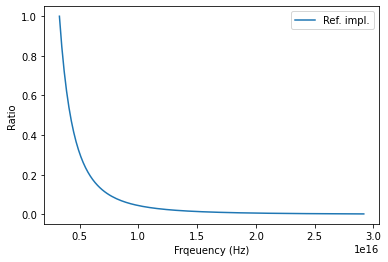

In [6]:
fig, ax = plt.subplots()
ax.plot(fr, h0cross_freqdep, label='Ref. impl.')
ax.set_ylabel("Ratio")
ax.set_xlabel("Frqeuency (Hz)")
ax.legend()